## Heart Disease prediction using Dataset on Kaggle 

https://www.kaggle.com/ronitf/heart-disease-uci

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [68]:
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

#### Read the Dataset

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


#### We have 14 Columns, out of which 13 are our independent Variables and the 'target' variable is our Output dependent variable

###### All of the Columns (features) do not have any missing or non-null values

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


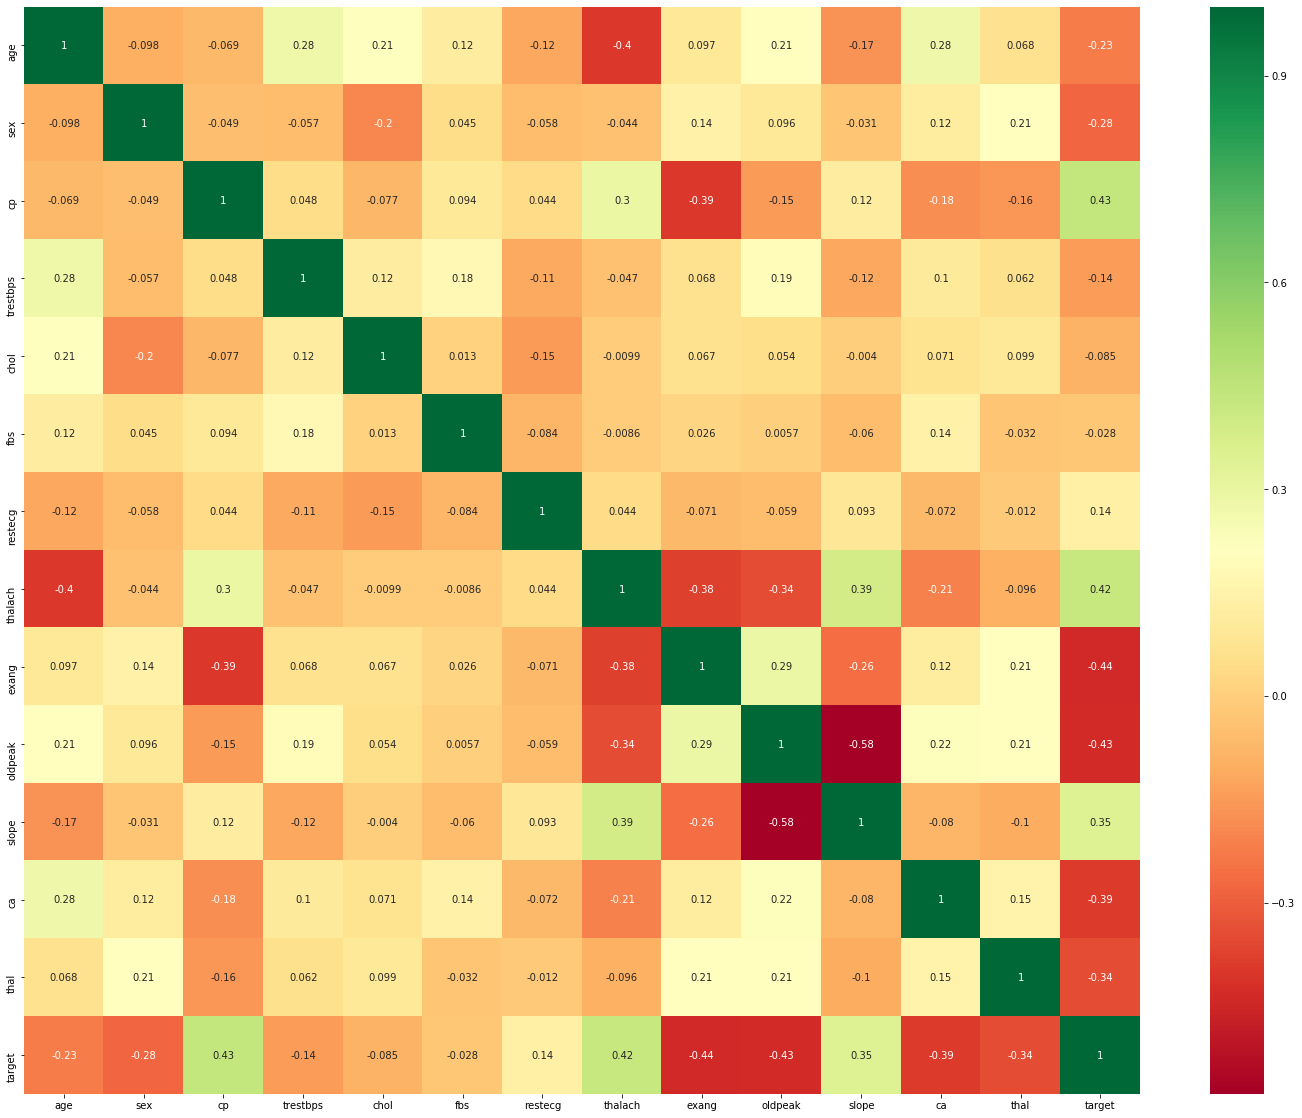

In [7]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),cmap='RdYlGn',annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000009B18B51048>,
      dtype=object)

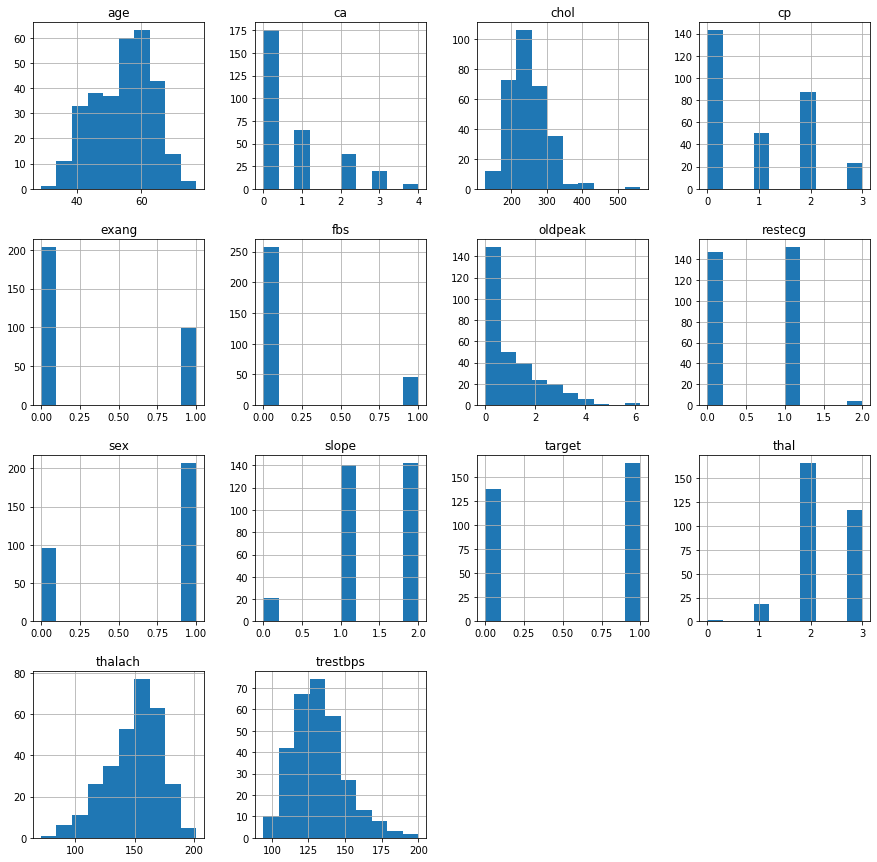

In [8]:
df.hist(figsize=(15,15))

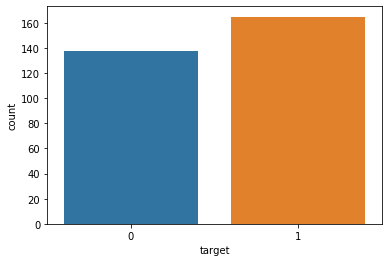

In [9]:
sns.countplot(x='target',data=df)

The following variables can be treated as categorical variables since they fall into certain categorical value range :

###  sex (0,1) ; cp (0,1,2,3) ; fbs (0,1) ; restecg (0,1,2) ;  exang (0,1) ; slope (0,1,2) ; ca (0,1,2,3,4) ; thal (0,1,2,3)

We convert the above Categorical variables into dummy variables 

In [10]:
df_1 = pd.get_dummies(data=df, columns=['sex','cp','fbs','restecg','exang','slope','ca','thal'])

In [11]:
df_1.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


Next, we need to scale down the values for the following non-categorical variables

#### age, trestbps, chol, thalach, oldpeak

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
columns_to_scale = ['age','trestbps','chol','thalach','oldpeak']

In [14]:
standard_scaler = StandardScaler()

In [15]:
df_1[columns_to_scale] = standard_scaler.fit_transform(df_1[columns_to_scale])

In [16]:
df_1.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


Now that we have converted our Categorical variables into dummy variables and non-Categorical variables in Standard Scale, we can start building ML model

In [17]:
X = df_1.drop(columns=['target'],axis=1)
y = df_1['target']

In [18]:
from sklearn.model_selection import cross_val_score

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    score_knn = cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score_knn.mean())

In [21]:
knn_scores

[0.7482684464219502,
 0.7652651093807934,
 0.8112940304041528,
 0.8046273637374861,
 0.8338820912124584,
 0.8307563959955505,
 0.8374378939562476,
 0.8410938079347423,
 0.8474378939562477,
 0.8474378939562477,
 0.8407638116425659,
 0.8506637004078605,
 0.8338820912124583,
 0.8337671486837227,
 0.8272080088987763,
 0.8372154245457917,
 0.8274304783092326,
 0.8209788654060068,
 0.8242046718576195,
 0.8243196143863551]

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
rf_scores = []
for j in range(1,21):
    rf_classifier = RandomForestClassifier(n_estimators=j)
    score_rf = cross_val_score(rf_classifier,X,y,cv=10)
    rf_scores.append(score_rf.mean())

In [24]:
rf_scores

[0.7681609195402299,
 0.6885613644790507,
 0.7815016685205783,
 0.7826214312198739,
 0.8047423062662217,
 0.7977530589543937,
 0.8178680014831293,
 0.7779532814238043,
 0.8477827215424547,
 0.814182424916574,
 0.8078605858361143,
 0.8343196143863553,
 0.8307563959955505,
 0.8080904708935854,
 0.8243047830923249,
 0.8238746755654432,
 0.8405487578791249,
 0.8372302558398221,
 0.8377678902484244,
 0.8246496106785317]

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
dt_scores = []
for m in range(1,21):
    dt_classifier = DecisionTreeClassifier(max_depth=m)
    score_dt = cross_val_score(dt_classifier,X,y,cv=10)
    dt_scores.append(score_dt.mean())

In [27]:
dt_scores

[0.7418168335187245,
 0.7321468298109008,
 0.7877382276603634,
 0.7676158694846125,
 0.7641675936225435,
 0.7583833889506859,
 0.7384835001853911,
 0.7516017797552836,
 0.747816091954023,
 0.7579384501297739,
 0.7414720059325177,
 0.7411420096403412,
 0.7484835001853911,
 0.7345828698553949,
 0.7411420096403412,
 0.7580459770114942,
 0.7614942528735631,
 0.7552725250278087,
 0.7448127549128661,
 0.7410270671116056]

In [30]:
from xgboost import XGBClassifier

In [29]:
from sklearn.model_selection import RandomizedSearchCV

In [31]:
xgb_classifier = XGBClassifier()

In [45]:
xgb_score = cross_val_score(xgb_classifier,X,y,cv=10)

In [46]:
xgb_score

array([0.90322581, 0.80645161, 0.90322581, 0.90322581, 0.90322581,
       0.66666667, 0.73333333, 0.83333333, 0.72413793, 0.79310345])

In [47]:
xgb_score.mean()

0.8169929551353355

In [38]:
xgb_params = { 'max_depth' : [2, 3, 4, 5, 6, 8, 10, 12, 15] ,
               'learning_rate' : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30] ,
               'min_child_weight' : [1, 3, 5, 7, 8, 9] ,
               'gamma' : [0.0, 0.1, 0.2 , 0.3, 0.4, 0.5, 0.6] ,
               'colsample_bytree' : [0.1, 0.2, 0.3, 0.4, 0.5 , 0.7]    
}

In [39]:
randomized_optimizer = RandomizedSearchCV(estimator=xgb_classifier, param_distributions=xgb_params, n_iter=5, scoring='roc_auc', n_jobs=-1, cv=5, verbose=2)

In [40]:
randomized_optimizer.fit(X,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  25 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.5s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0...
                   iid='warn', n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.1, 0.2, 0.3, 0.4,
                                                             0.5, 0.7],
                 

In [41]:
randomized_optimizer.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.6,
              learning_rate=0.15, max_delta_step=0, max_depth=6,
              min_child_weight=9, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [43]:
randomized_optimizer.best_params_

{'min_child_weight': 9,
 'max_depth': 6,
 'learning_rate': 0.15,
 'gamma': 0.6,
 'colsample_bytree': 0.5}

In [44]:
xgb_optimized_classifier = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.6,
              learning_rate=0.15, max_delta_step=0, max_depth=6,
              min_child_weight=9, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1) 

In [61]:
xgb_optimized_score = cross_val_score(xgb_optimized_classifier,X,y,cv=30)

In [49]:
xgb_optimized_score

array([0.90322581, 0.87096774, 0.90322581, 0.93548387, 0.90322581,
       0.8       , 0.83333333, 0.86666667, 0.75862069, 0.82758621])

In [50]:
xgb_optimized_score.mean()

0.8602335928809788

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
logistic_classifier = LogisticRegression()

In [69]:
score_logistic = cross_val_score(logistic_classifier,X,y,cv=15)

In [66]:
score_logistic.mean()

0.8546031746031747

In [70]:
from sklearn.cluster import KMeans

In [71]:
kmeans_classifier = KMeans(n_clusters=2)

In [77]:
kmeans_classifier.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [78]:
score_kmeans = cross_val_score(kmeans_classifier,X,y,cv=10)

In [79]:
score_kmeans

array([-225.10868668, -205.61903519, -247.80923305, -225.87766016,
       -214.43516879, -205.02310253, -224.56579464, -271.67893602,
       -274.65092707, -245.25453157])

In [80]:
from sklearn.svm import SVC

In [81]:
svc_classifier = SVC()

In [82]:
score_svc = cross_val_score(svc_classifier,X,y,cv=10)

In [83]:
score_svc

array([0.90322581, 0.83870968, 0.83870968, 0.96774194, 0.83870968,
       0.8       , 0.83333333, 0.83333333, 0.75862069, 0.79310345])

In [84]:
score_svc.mean()

0.8405487578791251